Consider a current $I$ flowing counterclockwise in a loop in the xy-plane with a 3-petal shape as follows:

$$\vec{l}(t) = R\left[1+\frac{3}{4}\sin(3 t)\right] \cdot \left<\cos t, \sin t, 0 \right> $$

where $0 \leq t \leq 2\pi$. The Biot-Savard Law tells us

$$\vec{B}(\vec{r}) =  \frac{\mu_0 I}{4 \pi} \int_C \frac{d\vec{l} \times (\vec{r}-\vec{l})}{|\vec{r}-\vec{l}|^3} = \int_0^{2 \pi} \frac{d\vec{l}/dt \times (\vec{r} - \vec{l})}{|\vec{r}-\vec{l}|^3} dt$$

Putting this in dimensionless form

* $\vec{l} \to \vec{l}/R$
* $\vec{r} \to \vec{r}/R$

we get

$$\frac{4 \pi R}{\mu_0 I} \vec{B}(\vec{r}) = \int_0^{2 \pi} \frac{d\vec{l}/dt \times (\vec{r} - \vec{l})}{|\vec{r}-\vec{l}|^3} dt$$


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad, quad_vec
import plotly.graph_objects as go
from IPython.display import HTML
from IPython.display import Image, display
from IPython.core.display import HTML

Start by looking at curve

In [2]:
def cot(y):
  if not np.all(np.isclose(np.tan(y), 0.0)):
    return 1/np.tan(y)
  else:
      return 0

def floor(x): 
    return (-0.5 + x + np.arctan(cot(np.pi * x))/np.pi)

def l(phi):
    return (((np.cos(np.pi/4))/(np.cos(phi- (np.pi/2) * floor((4*phi + np.pi)/(2*np.pi))))) * np.array([np.cos(phi), np.sin(phi), np.zeros(len(phi))]))
    # return np.array([np.cos(phi), np.sin(phi), np.zeros(len(phi))])

def dl(phi):
    # return np.array([-np.sin(phi), np.cos(phi), np.zeros(len(phi))])
    dl = np.zeros(rprime.shape)
    dl[2, :] = 0.0  # z-component of the tangent vector is always zero
    for i in range(len(t)):
        # tangent vector in the +yhat direction
        if t[i] <= np.pi / 4.0 or t[i] >= 7.0 * np.pi / 4.0:
            dl[0, i] = 0.0
            dl[1, i] = 1.0
        # tangent vector in the -xhat direction
        if t[i] > np.pi / 4.0 and t[i] <= 3 * np.pi / 4.0:
            dl[0, i] = -1.0
            dl[1, i] = 0.0
        # tangent vector in the -yhat direction
        if t[i] > 3.0 * np.pi / 4.0 and t[i] <= 5.0 * np.pi / 4.0:
            dl[0, i] = 0.0
            dl[1, i] = -1.0
        # tangent vector in the +xhat direction
        if t[i] > 5 * np.pi / 4.0 and t[i] <= 7.0 * np.pi / 4.0:
            dl[0, i] = 1.0
            dl[1, i] = 0.0
    return dl


In [3]:
t = np.linspace(0, np.pi*2, 300, endpoint=False)
t = t + (t[1] - t[0]) / 2.0  # Need to shift phi to avoid the sharp corners of the rectangle during integration!
lx, ly, lz = l(t)

0.7071067811865478 -0.7071067811865481


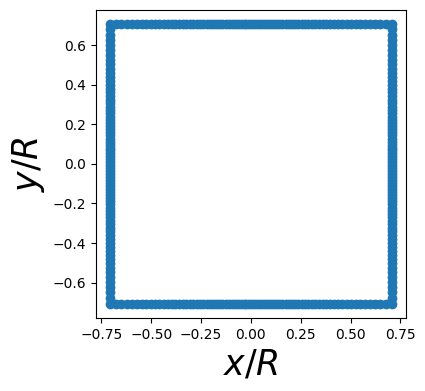

In [4]:
plt.figure(figsize=(4, 4))
plt.plot(lx, ly, 'o')
print(np.max(ly), np.min(ly))
# print(ly, lx, lz)
plt.xlabel('$x/R$', fontsize=25)
plt.ylabel('$y/R$', fontsize=25)
plt.show()

In [5]:
# t, x, y, z = smp.symbols('t, x, y, z')
rprime = l(t)
a = 0.7071067811865477
x = 0
y = 0
z = 0.0

Get $\vec{r}'$, $\vec{r}$, and the seperation vector $\vec{r} - \vec{r}'$

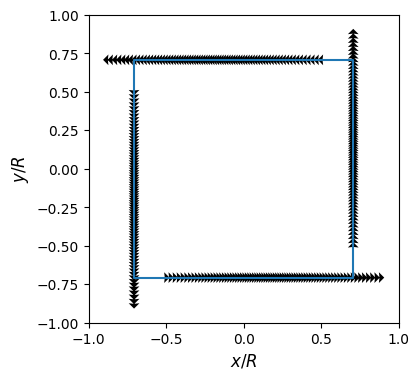

In [6]:
# slicing a numpy array with None allows you to multiply together arrays of different sizes to make a larger array
r = np.array([x, y, z])[:, None] * np.ones(rprime.shape)
sep = r - rprime 

# Need to define the tangent vector to the curve everywhere 
dl = dl(t)

# print(r, rprime, dl, dl.shape)
# Plot the curve again with the dl vectors on there
plt.figure(figsize=(4, 4))
plt.plot(lx, ly)
plt.quiver(lx, ly, dl[0, :], dl[1, :], scale=10, headwidth=10)
plt.xlabel('$x/R$', fontsize=12)
plt.ylabel('$y/R$', fontsize=12)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

Define the integrand

In [7]:
# print(dl.shape, sep.shape)
# print(t[1:] - t[:-1])
# print(lx[1:] - lx[:-1])
# print(ly[1:] - ly[:-1])
dly = ly[1:] - ly[:-1]
dly = np.insert(dly, 0, ly[0] - ly[-1])
dly = np.abs(dly)
dlx = lx[1:] - lx[:-1]
dlx = np.insert(dlx, 0, lx[0] - lx[-1])
dlx = np.abs(dlx)

# If sep is a 2D array, need to make sure this is a vector magnitude, for each point in the integral!
integrand = np.cross(dl.T, sep.T) / np.linalg.norm(sep, axis=0)[:, None] ** 3

# Now do the sum over all the points of the rectangle (an approximation of the integral)
# Note that integral (...) dphi is approximately the same as
# sum_{i=1}^N (...) dphi_i, for many points, N >> 1. Since our phi variables
# is uniformly spaced around 0, 2 * pi, we can define dphi_i = phi[1] - phi[0],
# and that spacing will be the same at all points.
dphi = t[1] - t[0]
mu0 = 4*np.pi *1e-7
phi_45 = np.ravel(np.where(np.logical_or(t <= np.pi / 4.0, t > 7.0 * np.pi / 4.0)))
phi_135 = np.ravel(np.where(np.logical_and(t > np.pi / 4.0, t <= 3.0 * np.pi / 4.0)))
phi_225 = np.ravel(np.where(np.logical_and(t > 3 * np.pi / 4.0, t <= 5.0 * np.pi / 4.0)))
phi_315 = np.ravel(np.where(np.logical_and(t > 5 * np.pi / 4.0, t <= 7.0 * np.pi / 4.0)))
# print(phi_45, phi_315)
B = mu0 * np.sum(integrand[phi_45, :] * dly[phi_45, None], axis=0) / (4 * np.pi)
B += mu0 * np.sum(integrand[phi_135, :] * dlx[phi_135, None], axis=0) / (4 * np.pi)
B += mu0 * np.sum(integrand[phi_225, :] * dly[phi_225, None], axis=0) / (4 * np.pi)
B += mu0 * np.sum(integrand[phi_315, :] * dlx[phi_315, None], axis=0) / (4 * np.pi)
print(B)  # You will need to check that this value is correct! 

[0.00000000e+00 0.00000000e+00 7.99998739e-07]


In [8]:
def mu(a):
    return (1/np.sqrt(2*a**(-2)))
def b(y):
    return (mu0 * np.sqrt(2*a**(-2)))/np.pi
def r1(x,y,z,a): 
    return np.sqrt((x+a)**2 + (y+a)**2 + z**2)
def r2(x,y,z,a): 
    return np.sqrt((x-a)**2 + (y+a)**2 + z**2)
def r3(x,y,z,a): 
    return np.sqrt((x+a)**2 + (y-a)**2 + z**2)
def r4(x,y,z,a): 
    return np.sqrt((x-a)**2 + (y-a)**2 + z**2)

bx = ((-mu(a) * b(a) * z)/4) * (
    (1/(r1(x,y,z,a) * (r1(x,y,z,a) - y - a))) - (
    1/(r2(x,y,z,a) * (r2(x,y,z,a) - y - a))) - (
    1/(r3(x,y,z,a) * (r3(x,y,z,a) - y + a))) + (
    1/(r4(x,y,z,a) * (r4(x,y,z,a) - y + a))))
by = ((-mu(a) * b(a) * z)/4) * (
    (1/(r1(x,y,z,a) * (r1(x,y,z,a) - x - a))) - (
    1/(r2(x,y,z,a) * (r2(x,y,z,a) - x + a))) - (
    1/(r3(x,y,z,a) * (r3(x,y,z,a) - x - a))) + (
    1/(r4(x,y,z,a) * (r4(x,y,z,a) - x + a))))
bz = ((mu(a) * b(a))/4) * (
    ((x + a)/(r1(x,y,z,a) * (r1(x,y,z,a) - y - a)) + \
    (y + a)/(r1(x,y,z,a) * (r1(x,y,z,a) - x - a)) \
    -(x - a)/(r2(x,y,z,a) * (r2(x,y,z,a) - y - a)) \
    -(y + a)/(r2(x,y,z,a) * (r2(x,y,z,a) - x + a)) \
    -(x + a)/(r3(x,y,z,a) * (r3(x,y,z,a) - y + a)) \
    -(y - a)/(r3(x,y,z,a) * (r3(x,y,z,a) - x - a)) \
    +(x - a)/(r4(x,y,z,a) * (r4(x,y,z,a) - y + a)) \
    +(y - a)/(r4(x,y,z,a) * (r4(x,y,z,a) - x + a))))
print(bx, by, bz)

-0.0 -0.0 7.999999999999998e-07


Set up a meshgrid to solve for the field in some 3D volume

In [17]:
# Define a uniform 3D mesh
x = np.linspace(-1, 1, 5)
xv, yv, zv = np.meshgrid(x, x, x)

# Flatten the points so that the next lines are easier to code
xv = np.ravel(xv)
yv = np.ravel(yv)
zv = np.ravel(zv)
r = np.array([xv, yv, zv])

# Use fancy numpy slicing with None to get nice 3D vectors
sep = r[:, :, None] - rprime[:, None, :]
dl2 = dl[:, None, :] * np.ones(sep.shape[1])[None, :, None]

# Makes the coordinate dimension of size 3 the last dimension of the 3D arrays sep and dl2
sep = np.transpose(sep, axes=[1, 2, 0])
dl2 = np.transpose(dl2, axes=[1, 2, 0])
print(r.shape, rprime.shape, sep.shape, dl2.shape)

# Notice sep is now shape (number of coordinates, number of evaluation points, number of integral points on the wire)
# dl2 is unchanged from dl but needs to made into the same shape as sep 

(3, 125) (3, 300) (125, 300, 3) (125, 300, 3)


In [18]:
integrand = np.cross(dl2, sep) / (np.linalg.norm(sep, axis=-1) ** 3)[:, :, None]
# B_field = np.sum(integrand, axis=1) * dphi
# print(integrand.shape, B_field.shape)
# dly = ly[1:] - ly[:-1]
# dly = np.insert(dly, 0, ly[0] - ly[-1])

# Now do the sum over all the points of the rectangle (an approximation of the integral)
# Note that integral (...) dphi is approximately the same as
# sum_{i=1}^N (...) dphi_i, for many points, N >> 1. Since our phi variables
# is uniformly spaced around 0, 2 * pi, we can define dphi_i = phi[1] - phi[0],
# and that spacing will be the same at all points.
# dphi = t[1] - t[0]
# mu0 = 4*np.pi *1e-7
# phi_45 = np.ravel(np.where(np.logical_or(t <= np.pi / 4.0, t > 7.0 * np.pi / 4.0)))
# print(integrand.shape)

# B should be 4 times one of the sides! 
# B = 4 * np.sum(integrand[:, phi_45, :] * dly[None, phi_45, None], axis=1) / (4 * np.pi)
# B += mu0 * np.sum(integrand[phi_135, :] * dlx[phi_135, None], axis=0) / (4 * np.pi)
# B += mu0 * np.sum(integrand[phi_225, :] * dly[phi_225, None], axis=0) / (4 * np.pi)
# B += mu0 * np.sum(integrand[phi_315, :] * dlx[phi_135, None], axis=0) / (4 * np.pi)dly = ly[1:] - ly[:-1]
dly = np.insert(dly, 0, ly[0] - ly[-1])
dly = np.abs(dly)
dlx = lx[1:] - lx[:-1]
dlx = np.insert(dlx, 0, lx[0] - lx[-1])
dlx = np.abs(dlx)

# Now do the sum over all the points of the rectangle (an approximation of the integral)
# Note that integral (...) dphi is approximately the same as
# sum_{i=1}^N (...) dphi_i, for many points, N >> 1. Since our phi variables
# is uniformly spaced around 0, 2 * pi, we can define dphi_i = phi[1] - phi[0],
# and that spacing will be the same at all points.
dphi = t[1] - t[0]
mu0 = 4*np.pi *1e-7
phi_45 = np.ravel(np.where(np.logical_or(t <= np.pi / 4.0, t > 7.0 * np.pi / 4.0)))
phi_135 = np.ravel(np.where(np.logical_and(t > np.pi / 4.0, t <= 3.0 * np.pi / 4.0)))
phi_225 = np.ravel(np.where(np.logical_and(t > 3 * np.pi / 4.0, t <= 5.0 * np.pi / 4.0)))
phi_315 = np.ravel(np.where(np.logical_and(t > 5 * np.pi / 4.0, t <= 7.0 * np.pi / 4.0)))
# print(phi_45, phi_315)
B = np.sum(integrand[:, phi_45, :] * dly[None, phi_45, None], axis=1) # / (4 * np.pi)
B += np.sum(integrand[:, phi_135, :] * dlx[None, phi_135, None], axis=1) #/ (4 * np.pi)
B += np.sum(integrand[:, phi_225, :] * dly[None, phi_225, None], axis=1) #/ (4 * np.pi)
B += np.sum(integrand[:, phi_315, :] * dlx[None, phi_315, None], axis=1) #/ (4 * np.pi)
print(B, B.shape)  # You will need to check that this value is corr

# Reshape the Bfield
B_field = B.reshape(len(x), len(x), len(x), 3)
Bx = B_field[:, :, :, 0]
By = B_field[:, :, :, 1]
Bz = B_field[:, :, :, 2]

[[ 4.00551231e-01  4.00278209e-01  1.23541198e-01]
 [ 6.44883429e-01  6.35689623e-01 -2.87268666e-01]
 [ 0.00000000e+00  0.00000000e+00 -1.23669972e+00]
 [-6.44883429e-01 -6.35689623e-01 -2.87268666e-01]
 [-4.00551231e-01 -4.00278209e-01  1.23541198e-01]
 [ 3.32094607e-01  7.11558928e-01  3.87570971e-01]
 [ 6.41929696e-01  1.72155697e+00  8.70083829e-03]
 [ 0.00000000e+00  0.00000000e+00 -3.53856330e+00]
 [-6.41929696e-01 -1.72155697e+00  8.70083829e-03]
 [-3.32094607e-01 -7.11558928e-01  3.87570971e-01]
 [ 1.45197596e-02  8.62315857e-01  5.12962729e-01]
 [ 2.29413339e-02  2.18673289e+00  6.90970924e-02]
 [ 0.00000000e+00  0.00000000e+00 -4.42395303e+00]
 [-2.29413339e-02 -2.18673289e+00  6.90970924e-02]
 [-1.45197596e-02 -8.62315857e-01  5.12962729e-01]
 [-2.99203506e-01  7.22474411e-01  3.84874157e-01]
 [-5.44554997e-01  1.75103971e+00 -3.44254681e-02]
 [ 0.00000000e+00  0.00000000e+00 -3.80630303e+00]
 [ 5.44554997e-01 -1.75103971e+00 -3.44254681e-02]
 [ 2.99203506e-01 -7.22474411e-

In [19]:
# Looks like some truncation to avoid divergent Bfield at the location of the wire?

Bx[Bx>1] = 1
By[By>1] = 1
Bz[Bz>1] = 1

Bx[Bx<-1] = -1
By[By<-1] = -1
Bz[Bz<-1] = -1

Use plotly to make an interactive 3D plot

In [20]:
# data = go.Cone(x=xv.ravel(), y=yv.ravel(), z=zv.ravel(),
#                u=Bx.ravel(), v=By.ravel(), w=Bz.ravel(),
#                colorscale='Purples', colorbar=dict(title='$x^2$'),
#                sizemode="absolute", sizeref=20)

# layout = go.Layout(title=r'Plot Title',
#                      scene=dict(xaxis_title=r'x',
#                                 yaxis_title=r'y',
#                                 zaxis_title=r'z',
#                                 aspectratio=dict(x=1, y=1, z=1),
#                                 camera_eye=dict(x=1.2, y=1.2, z=1.2))) 

# fig = go.Figure(data = data, layout=layout)
# fig.add_scatter3d(x=lx, y=ly, z=lz, mode='lines',
#                    line = dict(color='black', width=5))

# HTML(fig.to_html())
# fig.write_html('first_figure.html', auto_open=True)

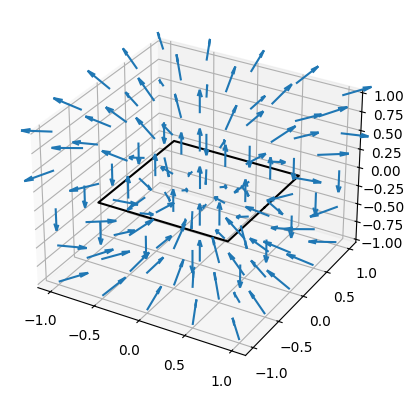

In [26]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(lx, ly, 'k')
ax.quiver(xv, yv, zv, 
          np.ravel(Bx),
          np.ravel(By),
          np.ravel(Bz), length=0.3, normalize=True)